### **로지스틱 회귀로 확률 예측**
k-최근접 이웃 모델이 확률을 출력할 수 있지만 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만 출력한다.   
이를 위해 가장 대표적인 분류 알고리즘 중 하나인 로지스틱 회귀를 사용한다. 로지스틱 회귀는 회귀 모델이 아닌 분류 모델이고, 선형 회귀처럼 선형 방정식을 사용한다. 하지만 선형 회귀처럼 계산한 값을 그대로 출력하는 것이 아니라 로지스틱 회귀는 이 값을 0 ~ 1 사이로 압축한다. 우리는 이 값을 0% ~ 100% 사이의 확률로 이해할 수 있다.   
로지스틱 회귀는 이진 분류에서는 하나의 선형 방정식을 훈련한다. 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값을 만든다. 이 값이 양성 클래스에 대한 확률이고 음성 클래스에 대한 확률은 1에서 빼면 된다.   
다중 분류일 경우에는 클래스 개수만큼 방정식을 훈련한다. 그다음 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 만든다. 이 값을 각 클래스에 대한 확률로 이해할 수 있다.

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()     # 처음 5개 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


판다스의 **데이터프레임(dataframe)**은 판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조이다. 데이터프레임은 넘파이 배열과 비슷하게 열과 행으로 이루어져 있다. 데이터프레임은 통계와 그래프를 위한 메소드를 풍부하게 제공한다. 또 데이터프레임은 넘파이로 상호 변환이 쉽고 사이킷런과도 잘 호환된다.

In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용한다.   
데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 변환된다. 이를 to_numpy() 메소드로 넘파이 배열로 바꿔준다.

In [42]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### **다중분류**
타깃 데이터에 2개 이상의 클래스가 포함된 문제

In [14]:
print(kn.classes_)    # 자동으로 알파벳 순으로 정렬되어있다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


이 5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까? 사이킷런의 분류 모델은 predict_proba() 메소드로 클래스별 확률값을 반환한다.   
넘파이 round()함수는 기본으로 소수점 첫째 자리에서 반올림 하는데, decimals 매개변수로 유지할 소수점 아래 자리수를 지정할 수 있다.

In [16]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))    # 소수점 네 번째 자리까지 출력

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [18]:
distances, indexes = kn.kneighbors(test_scaled[3:4])    # kneighbors 메소드의 입력은 2차원 배열이어야 한다.
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### **로지스틱 회귀(Logistic regression)**
로지스틱 회귀는 이름은 회귀이지만 분류 모델이다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다.

### **시그모이드 함수 / 시그모이드 그래프**
시그모이드 그래프는 z가 아주 작은 수가 되면 0에 수렴하고, z가 아주 큰 수가 되면 1에 수렴하는 그래프이다.

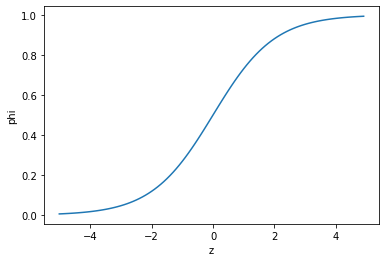

In [19]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)   # -5와 5 사이에 0.1 간격으로 배열 z를 만든다.
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [21]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])    # 넘파이에서 제공하는 불리언 인덱싱

['A' 'C']


In [22]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')   # 도미와 빙어에 대한 행만 골라내는 작업
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [24]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [25]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [26]:
print(lr.classes_)

['Bream' 'Smelt']


In [27]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


이 로지스특 회귀 모델이 학습한 방정식은 다음과 같다.   
z = - 0.404 * (Weight) - 0.576 * (Length) - 0.663 * (Diagonal) - 1.013 * (Height) - 0.732 * (Width) - 2.161

LogisticRegression 클래스는 decision_function() 메소드로 z값을 출력할 수 있다.

In [30]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


파이썬의 사이파이(scipy) 라이브러리에 시그모이드 함수가 있다.

In [31]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


앞에서 이진 분류를 위해 로지스특 회귀 모델을 훈련시켜 보았다. 다중 분류도 크게 다르지 않다. 이번에도 LogisticRegression 클래스를 사용해 7개의 생선을 분류해 보겠다.   
LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다. max_iter 매개변수에서 반복 횟수를 지정하면 기본값은 100이다.   
LogisticRegression 클래스는 릿지 회귀와 같이 계수의 제곱을 규제한다. 이런 규제를 L2 규제라고도 부른다. 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했다. LogisticRegression에서 규제를 제어하는 매개변수는 C 이다. 하지만 alpha와는 반대로 작을수록 규제가 커진다. C의 기본값은 1이다.

In [32]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [33]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [34]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [35]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [36]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [37]:
print(lr.coef_, lr.intercept_)

[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]] [-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


다중 분류는 위에서 볼 수 있듯 z를 7개씩 계산한다. 다중 분류는 클래스마다 z값을 하나씩 계산한다. 이 중 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다. 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했다. 다중 분류는 이와 달리 **소프트맥스(softmax)** 함수를 사용하여 7개의 z값을 확률로 변환한다.   
* 소프트맥스에 대한 자세한 수식은 책 190, 191 pg 참고

In [39]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


사이파이는 소프트맥스 함수도 제공한다.

In [40]:
from scipy.special import softmax
proba = softmax(decision, axis=1)   # axis=1 에 대한 의미는 각 행, 즉 각 샘플에 대해 소프트맥스를 계산하라는 것이다.
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


출력 결과를 앞서 구한 proba 배열과 비교해보면 정확히 일치하는것을 볼 수 있다.